## Prediction using Unsupervised Learning

## Kmeans Clustering on Iris dataset using Python

In this notebook we will go through kmeans clustering on iris dataset where I predict the optimum number of clusters in the dataset and present it visually.

Goal of the Study:
- To perform exploratory analysis on the data and build k-means clustering model to cluster them into groups.
- We assumed we do not species column to form clusters and then used it to check our model performance.

### Importing necessary libararies

In [10]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

### Load the dataset

In [11]:
iris = load_iris()

In [12]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Define target and predictors

In [13]:
df = pd.DataFrame(data=iris.data,columns=['sepal length', 'sepal width','petal length','petal width'])
df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Iris has 4 numeric variables and a tri class target variable. In this dataset, there are 4 features sepal length, sepal width, petal length and petal width and the target variable has 3 classes namely ‘setosa’, ‘versicolor’, and ‘virginica’. Objective for a multiclass classifier is to predict the target class given the values for the four features.

In [14]:
df['target'] = pd.Series(iris.target)
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
df['target_names'] = pd.Series(iris.target_names)
df

,sepal length,sepal width,petal length,petal width,target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,versicolor
2,4.7,3.2,1.3,0.2,0,virginica
3,4.6,3.1,1.5,0.2,0,NaN
4,5.0,3.6,1.4,0.2,0,NaN
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,NaN
146,6.3,2.5,5.0,1.9,2,NaN
147,6.5,3.0,5.2,2.0,2,NaN
148,6.2,3.4,5.4,2.3,2,NaN


In [17]:
species = []
for i in range(len(df)):
    if df.iloc[i]['target']==0:
        species.append('setosa')
    elif df.iloc[i]['target']==1:
        species.append('versicolor')
    elif df.iloc[i]['target']==2:
        species.append('virginica')

df['Species'] = species

In [18]:
df

,sepal length,sepal width,petal length,petal width,target,target_names,Species
0,5.1,3.5,1.4,0.2,0,setosa,setosa
1,4.9,3.0,1.4,0.2,0,versicolor,setosa
2,4.7,3.2,1.3,0.2,0,virginica,setosa
3,4.6,3.1,1.5,0.2,0,NaN,setosa
4,5.0,3.6,1.4,0.2,0,NaN,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,NaN,virginica
146,6.3,2.5,5.0,1.9,2,NaN,virginica
147,6.5,3.0,5.2,2.0,2,NaN,virginica
148,6.2,3.4,5.4,2.3,2,NaN,virginica


In [21]:
x = iris.data
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Data Visualization

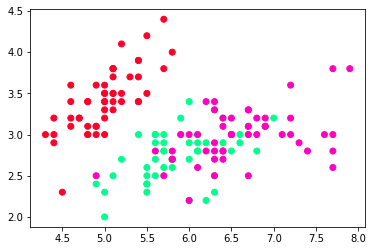

In [22]:
plt.scatter(x=df['sepal length'], y=df['sepal width'],c=iris.target,cmap='gist_rainbow')

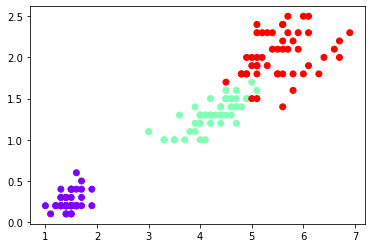

In [41]:
plt.scatter(x=df['petal length'], y=df['petal width'],c=iris.target,cmap='rainbow')

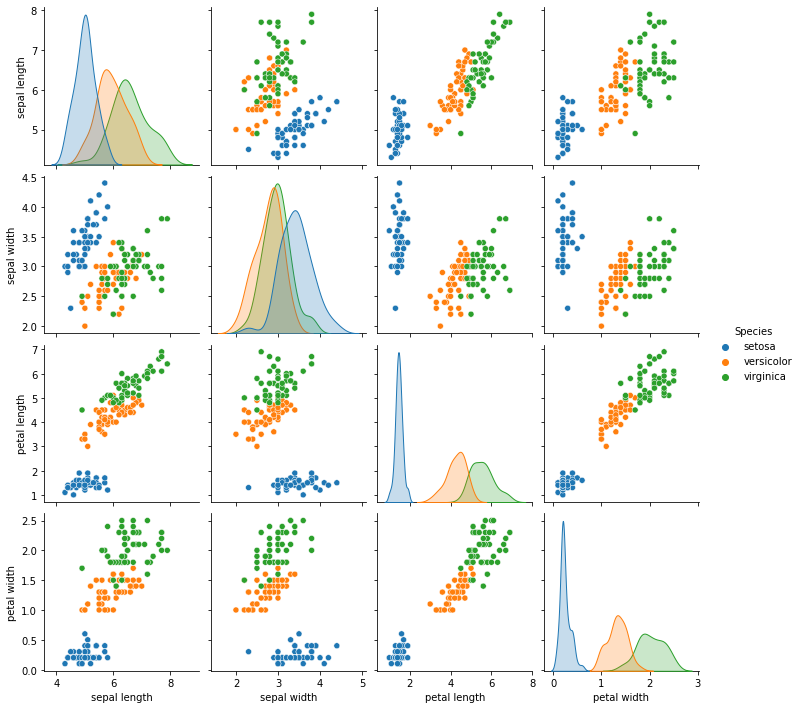

In [27]:
sns.pairplot(df.drop(['target'],axis=1),hue='Species',height=2.5)

<AxesSubplot:xlabel='Species', ylabel='petal width'>

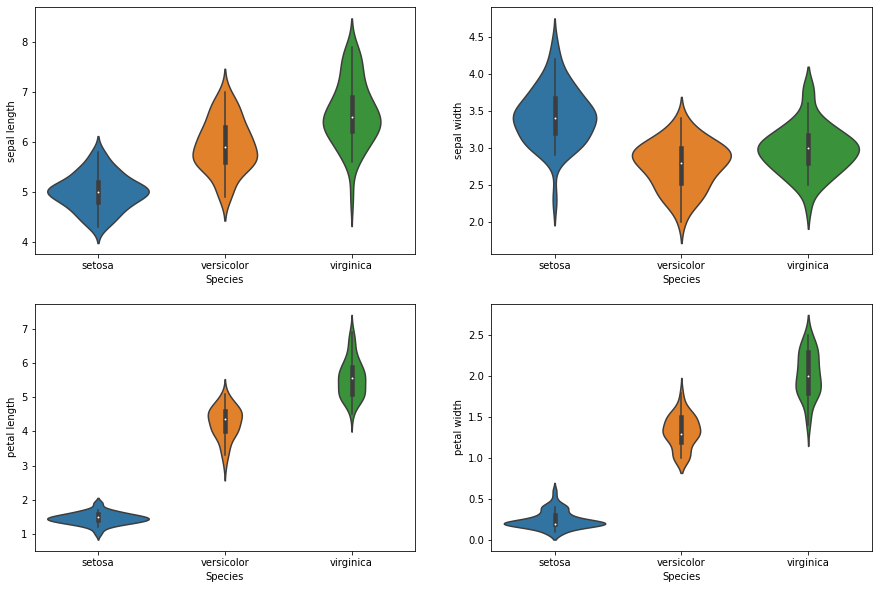

In [46]:
#Violin Plot. The violinplot shows density of the length and width in the species. 
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='sepal length', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='sepal width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='petal length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='petal width',data=df)

<AxesSubplot:xlabel='Species', ylabel='petal width'>

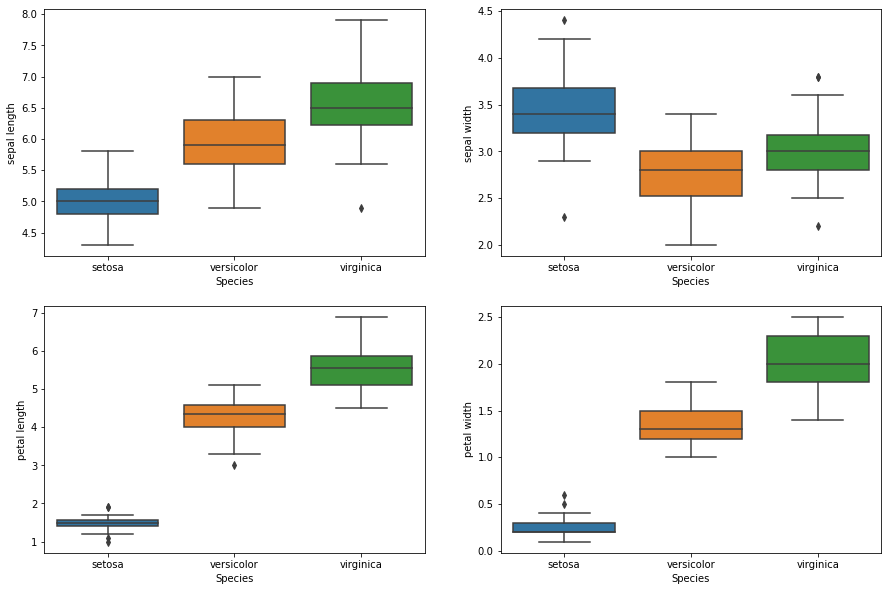

In [48]:
#Box plot for distribution of target variable wrt all independent variables
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='sepal length',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='sepal width',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='petal length',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='petal width',data=df)

### Using the elbow method to estimate the value of k

In [29]:
kmeans5 = KMeans(n_clusters=5, init='k-means++',random_state=0)
y=kmeans5.fit_predict(x)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 2 4 2 4 2 4 2 2 2 2 4 2 4 2 2 4 2 4 2 4 4
 4 4 4 4 4 2 2 2 2 4 2 4 4 4 2 2 2 4 2 2 2 2 2 4 2 2 1 4 3 1 1 3 2 3 1 3 1
 1 1 4 1 1 1 3 3 4 1 4 3 4 1 3 4 4 1 3 3 3 1 4 4 3 1 1 4 1 1 1 4 1 1 1 4 1
 1 4]


In [30]:
kmeans5.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.24722222, 2.84722222, 4.775     , 1.575     ]])

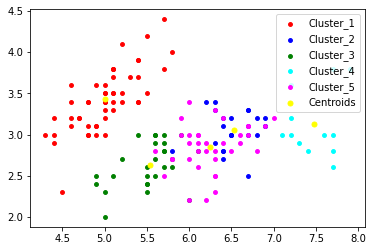

In [31]:
#x[y==0,0] finds all the rows of x that have a y value of 0 (y == 0), and are in the first column of X i.e sepal length
# Similarly  x[y==0,1] finds all the rows of x that have a y value of 0 (y == 0), and are in the second column of X i.e sepal width
plt.scatter(x[y == 0,0], x[y==0,1], s = 15, c= 'red', label = 'Cluster_1')
plt.scatter(x[y == 1,0], x[y==1,1], s = 15, c= 'blue', label = 'Cluster_2')
plt.scatter(x[y == 2,0], x[y==2,1], s = 15, c= 'green', label = 'Cluster_3')
plt.scatter(x[y == 3,0], x[y==3,1], s = 15, c= 'cyan', label = 'Cluster_4')
plt.scatter(x[y == 4,0], x[y==4,1], s = 15, c= 'magenta', label = 'Cluster_5')

plt.scatter(kmeans5.cluster_centers_[:,0], kmeans5.cluster_centers_[:,1], s = 25, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()
#plot.legend()

C:\Users\Reshma Jawale\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Reshma Jawale\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


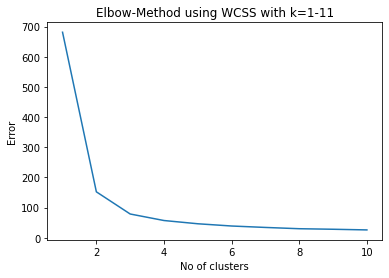

In [35]:
#The output graph of the Elbow method is shown below. Note that the shape of elbow is approximately formed at k=3
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
Error =[]
for i in range(1, 11):
    kmeans11 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0).fit(x)
    kmeans11.fit(x)
    Error.append(kmeans11.inertia_)
plt.plot(range(1, 11), Error)
plt.title('Elbow-Method using WCSS with k=1-11')
plt.xlabel('No of clusters')
plt.ylabel('Error') #within cluster sum of squares
plt.show()

In [36]:
kmeans3 = KMeans(n_clusters=3,random_state=21)
y=kmeans3.fit_predict(x)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [37]:
kmeans3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

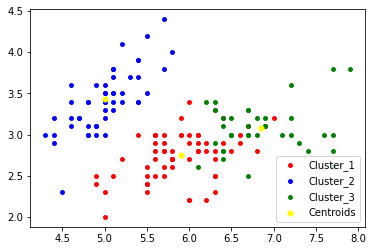

In [45]:
#Applying kmeans to the dataset / Creating the kmeans classifier
plt.scatter(x[y == 0,0], x[y==0,1], s = 15, c= 'red', label = 'Cluster_1')
plt.scatter(x[y == 1,0], x[y==1,1], s = 15, c= 'blue', label = 'Cluster_2')
plt.scatter(x[y == 2,0], x[y==2,1], s = 15, c= 'green', label = 'Cluster_3')
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s = 25, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

### Comparing our original data versus clustered results below for Sepal length and Sepal Width.

Text(0.5, 1.0, 'Predicted')

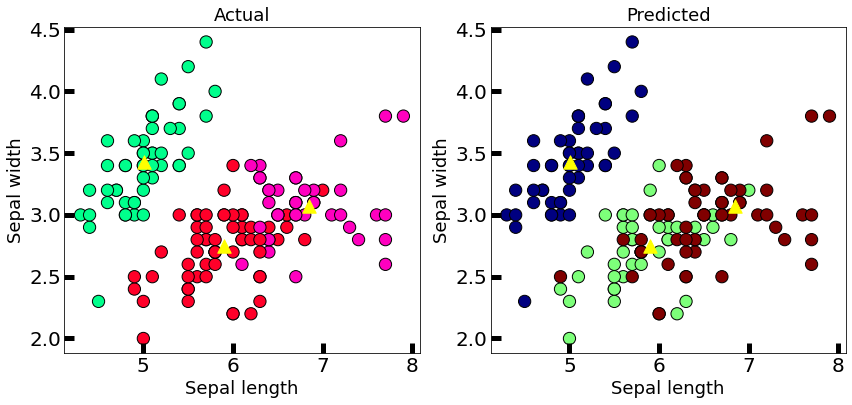

In [52]:
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['sepal length'], y=df['sepal width'], c=y, cmap='gist_rainbow',edgecolor='k', s=150) #you can also try cmap='rainbow'
axes[1].scatter(x=df['sepal length'], y=df['sepal width'], c=iris.target, cmap='jet',edgecolor='k', s=150)
axes[0].scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s = 180, c = 'yellow', marker='^', label = 'Centroids')
axes[1].scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s = 180, c = 'yellow', marker='^', label = 'Centroids')
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

### Comparing our original data versus clustered results below for Petal length and Petal Width.

Text(0.5, 1.0, 'Predicted')

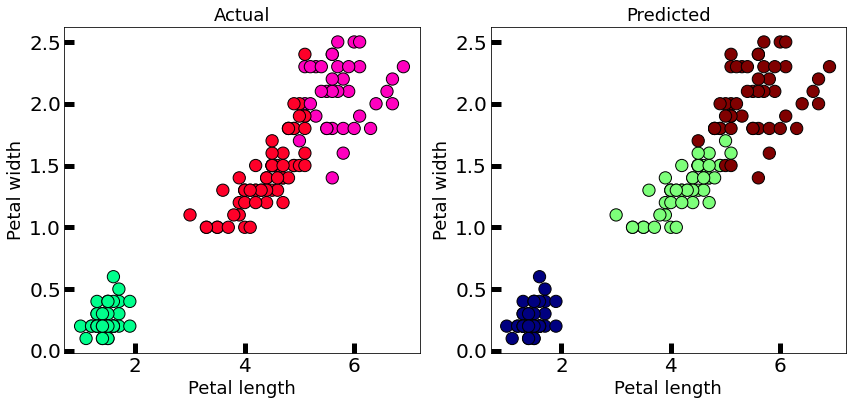

In [57]:
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['petal length'], y=df['petal width'], c=y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(x=df['petal length'], y=df['petal width'], c=iris.target, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)